## Loading train and test data with transforms and loader functions



In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls

data  drive  evaluate.py  main.py  model.py  __pycache__  sample_data


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


### Plotting sample images

## The Model

In [4]:
from model import *

# Loading Custom Model
net = CIFAR10Net(norm_method='BN')

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary



In [5]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             108
              ReLU-2            [-1, 4, 32, 32]               0
       BatchNorm2d-3            [-1, 4, 32, 32]               8
           Dropout-4            [-1, 4, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             288
              ReLU-6            [-1, 8, 32, 32]               0
       BatchNorm2d-7            [-1, 8, 32, 32]              16
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             128
             ReLU-10           [-1, 16, 32, 32]               0
      BatchNorm2d-11           [-1, 16, 32, 32]              32
          Dropout-12           [-1, 16, 32, 32]               0
    

## Define a Loss function and optimizer

In [6]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

## Training and Testing

In [7]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 20

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test.execute(net, device, testloader, criterion)

print('Finished Training')

Epoch: 0,Loss=1.19 Batch_id=390 Accuracy=45.97: 100%|██████████| 391/391 [00:22<00:00, 17.45it/s]


Test set: Average loss: 0.0095, Accuracy: 5697/10000 (56.97%)



Epoch: 1,Loss=0.97 Batch_id=390 Accuracy=62.13: 100%|██████████| 391/391 [00:19<00:00, 19.95it/s]


Test set: Average loss: 0.0081, Accuracy: 6442/10000 (64.42%)



Epoch: 2,Loss=0.96 Batch_id=390 Accuracy=68.58: 100%|██████████| 391/391 [00:17<00:00, 22.84it/s]


Test set: Average loss: 0.0069, Accuracy: 6969/10000 (69.69%)



Epoch: 3,Loss=0.72 Batch_id=390 Accuracy=72.30: 100%|██████████| 391/391 [00:18<00:00, 21.59it/s]


Test set: Average loss: 0.0066, Accuracy: 7118/10000 (71.18%)



Epoch: 4,Loss=0.55 Batch_id=390 Accuracy=74.33: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]


Test set: Average loss: 0.0063, Accuracy: 7223/10000 (72.23%)



Epoch: 5,Loss=0.62 Batch_id=390 Accuracy=76.25: 100%|██████████| 391/391 [00:18<00:00, 21.06it/s]


Test set: Average loss: 0.0060, Accuracy: 7384/10000 (73.84%)



Epoch: 6,Loss=0.47 Batch_id=390 Accuracy=80.50: 100%|██████████| 391/391 [00:17<00:00, 22.62it/s]


Test set: Average loss: 0.0053, Accuracy: 7684/10000 (76.84%)



Epoch: 7,Loss=0.38 Batch_id=390 Accuracy=81.59: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]


Test set: Average loss: 0.0053, Accuracy: 7682/10000 (76.82%)



Epoch: 8,Loss=0.52 Batch_id=390 Accuracy=81.70: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]


Test set: Average loss: 0.0052, Accuracy: 7736/10000 (77.36%)



Epoch: 9,Loss=0.43 Batch_id=390 Accuracy=82.26: 100%|██████████| 391/391 [00:17<00:00, 22.38it/s]


Test set: Average loss: 0.0052, Accuracy: 7713/10000 (77.13%)



Epoch: 10,Loss=0.51 Batch_id=390 Accuracy=82.45: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]


Test set: Average loss: 0.0053, Accuracy: 7711/10000 (77.11%)



Epoch: 11,Loss=0.70 Batch_id=390 Accuracy=82.77: 100%|██████████| 391/391 [00:17<00:00, 22.17it/s]


Test set: Average loss: 0.0053, Accuracy: 7729/10000 (77.29%)



Epoch: 12,Loss=0.54 Batch_id=390 Accuracy=83.35: 100%|██████████| 391/391 [00:18<00:00, 20.93it/s]


Test set: Average loss: 0.0052, Accuracy: 7762/10000 (77.62%)



Epoch: 13,Loss=0.51 Batch_id=390 Accuracy=83.53: 100%|██████████| 391/391 [00:17<00:00, 22.57it/s]


Test set: Average loss: 0.0052, Accuracy: 7757/10000 (77.57%)



Epoch: 14,Loss=0.61 Batch_id=390 Accuracy=83.68: 100%|██████████| 391/391 [00:20<00:00, 18.71it/s]


Test set: Average loss: 0.0052, Accuracy: 7749/10000 (77.49%)



Epoch: 15,Loss=0.46 Batch_id=390 Accuracy=83.73: 100%|██████████| 391/391 [00:17<00:00, 22.48it/s]


Test set: Average loss: 0.0052, Accuracy: 7746/10000 (77.46%)



Epoch: 16,Loss=0.45 Batch_id=390 Accuracy=83.60: 100%|██████████| 391/391 [00:18<00:00, 21.32it/s]


Test set: Average loss: 0.0052, Accuracy: 7762/10000 (77.62%)



Epoch: 17,Loss=0.48 Batch_id=390 Accuracy=83.68: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]


Test set: Average loss: 0.0052, Accuracy: 7760/10000 (77.60%)



Epoch: 18,Loss=0.41 Batch_id=390 Accuracy=83.96: 100%|██████████| 391/391 [00:17<00:00, 22.34it/s]


Test set: Average loss: 0.0052, Accuracy: 7757/10000 (77.57%)



Epoch: 19,Loss=0.39 Batch_id=390 Accuracy=83.94: 100%|██████████| 391/391 [00:17<00:00, 22.64it/s]


Test set: Average loss: 0.0052, Accuracy: 7744/10000 (77.44%)

Finished Training


## Evaluating Train Accuracy

In [8]:
from evaluate import *
calAccuracy(net, trainloader, device, name='train')

Accuracy of the network on the  train images: 85.304 %%


## Evaluating Test Accuracy

In [9]:
calAccuracy(net, testloader, device, name='test')

Accuracy of the network on the  test images: 77.44 %%


## Evaluating test Accuracy over different classes

In [10]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 79 %
Accuracy of   car : 96 %
Accuracy of  bird : 66 %
Accuracy of   cat : 67 %
Accuracy of  deer : 74 %
Accuracy of   dog : 60 %
Accuracy of  frog : 72 %
Accuracy of horse : 76 %
Accuracy of  ship : 84 %
Accuracy of truck : 82 %


## Misclassified Images

NameError: ignored

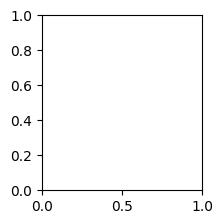

In [16]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)